In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chemMap as cm
import mineralML as mm

# this allows figures to be saved as svg files with the text preserved
plt.rcParams['svg.fonttype'] = 'none'
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

In [2]:
import pickle
with open('GalapGabbrosQuantData.pkl', 'rb') as f:
    Quant = pickle.load(f)

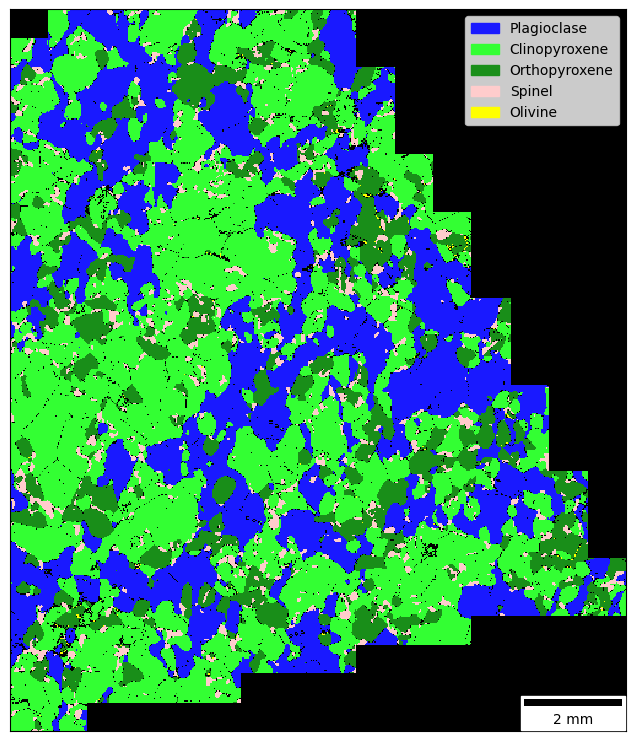

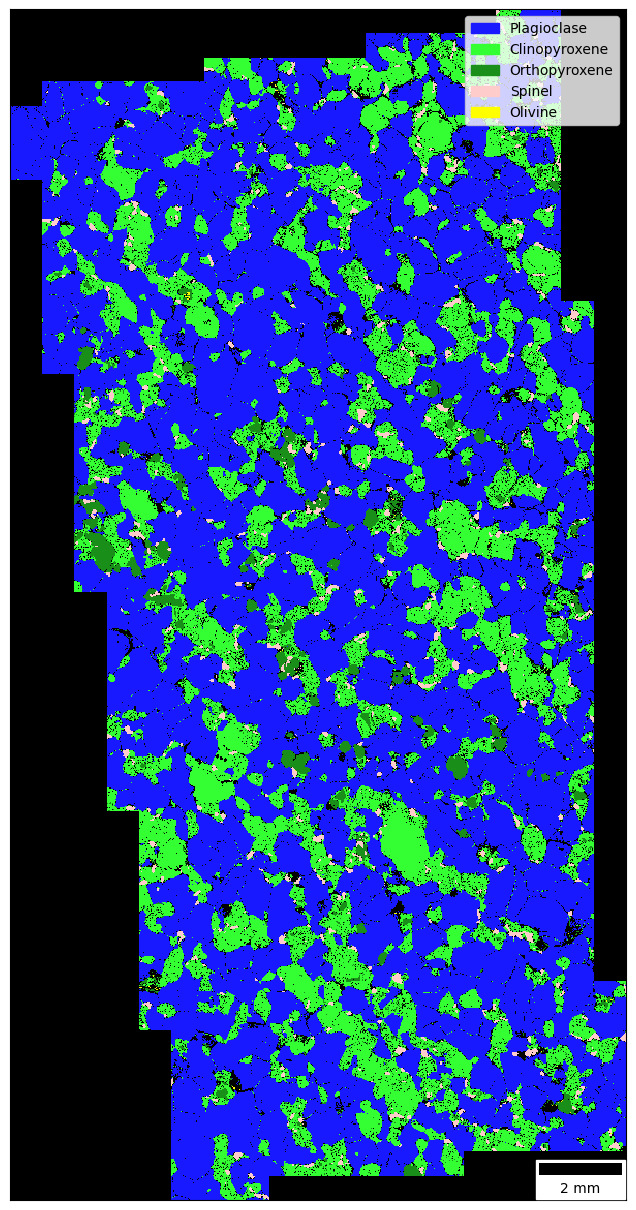

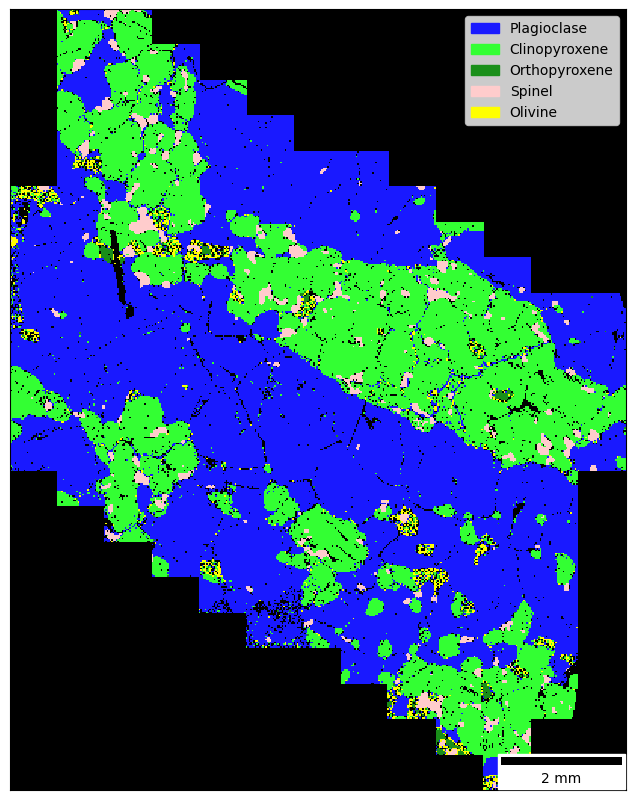

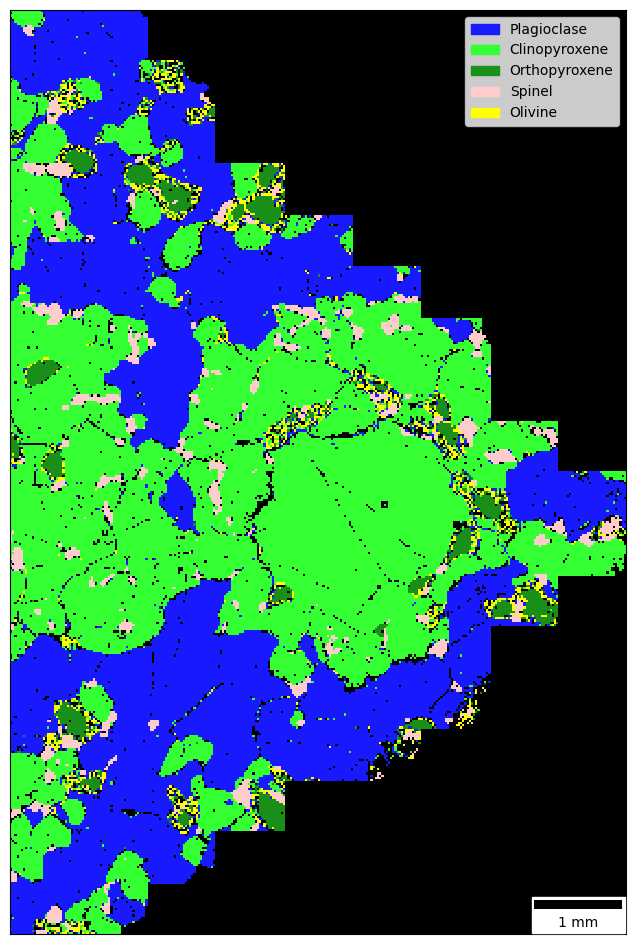

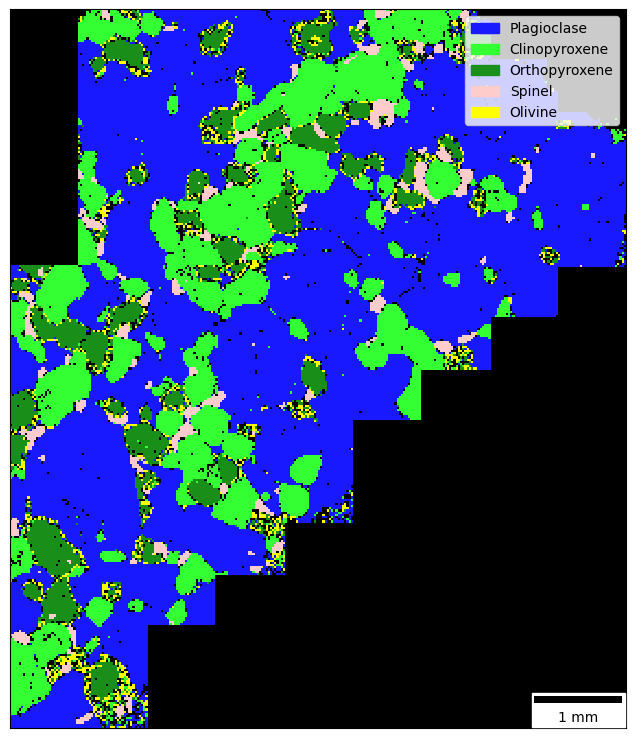

In [4]:
# plot phase maps
for s in Quant:
    cm.plot_PhaseMap(Data = Quant[s], Phases = {'Plagioclase': (0.1,0.1,1), 
                                                'Clinopyroxene': (0.2,1,0.2), 
                                                'Orthopyroxene': (0.1,0.56,0.1), 
                                                'Spinel': (1,0.8,0.8), 
                                                'Olivine': (1, 1, 0)}, 
                                      background = 'k',
                                      Resolution = 25)

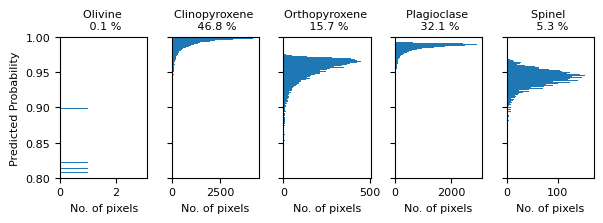

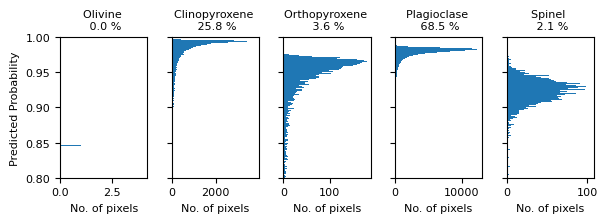

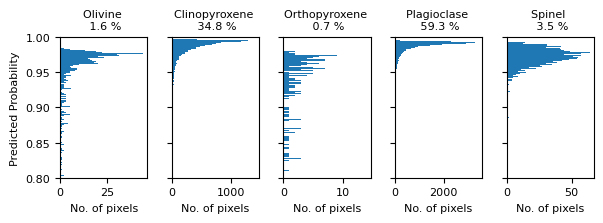

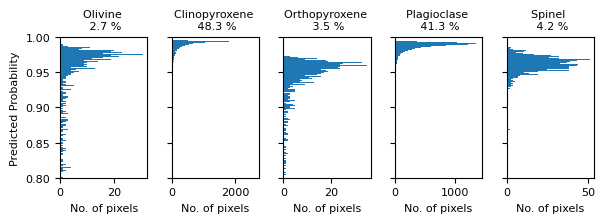

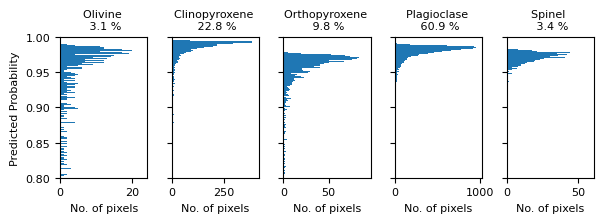

In [5]:
# plot histograms
for s in Quant:
    Phases = ['Olivine', 'Clinopyroxene', 'Orthopyroxene', 'Plagioclase', 'Spinel']
    # Initialize an empty list to store the lengths
    lengths = []

    # Loop through each phase
    for phase in Phases:
        # Count occurrences and flatten the result
        count = len(Quant[s]['PhaseProb'][Quant[s]['Mineral'] == phase].flatten())
        
        # Append the count to the list
        lengths.append(count)

    f, a = plt.subplots(1,5, figsize = (6,2), sharey = True)
    f.tight_layout()
    a[0].set_ylim([0.8, 1])
    a[0].set_ylabel('Predicted Probability', fontsize = 8)

    for i in range(len(Phases)):
        a[i].hist(Quant[s]['PhaseProb'][Quant[s]['Mineral'] == Phases[i]], orientation = "horizontal", bins = 1000)

        a[i].set_title(Phases[i] + ' \n ' + str(round(100*lengths[i]/np.sum(lengths), 1)) + ' %', fontsize = 8)
        a[i].set_xlabel('No. of pixels', fontsize = 8)
        a[i].tick_params(axis='both', labelsize=8)
